In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import os

In [2]:
# clusters : 'N','Y'
# frame/seg : 'F','S'
# cwt : '-','N','Y'
# window : '-','F','H'
# model : ['svm', 'RF', 'DNN', 'LSTM']

# [acc  ,FA  ,DR  ] ph7.4 train
# [acc.1,FA.1,DR.1] ph7.4 test
# [acc.2,FA.2,DR.2] ph7.4 true test
# [acc.3,FA.3,DR.3] sel 1 train
# [acc.4,FA.4,DR.4] sel 1 test
# [acc.5,FA.5,DR.5] sel 1 true test

# colors 'r','orange','y','g','c','b','m'

In [3]:
df = pd.read_csv('../final_data/result1.csv')

In [4]:
save_root = '../final_data/analysis_plot/'

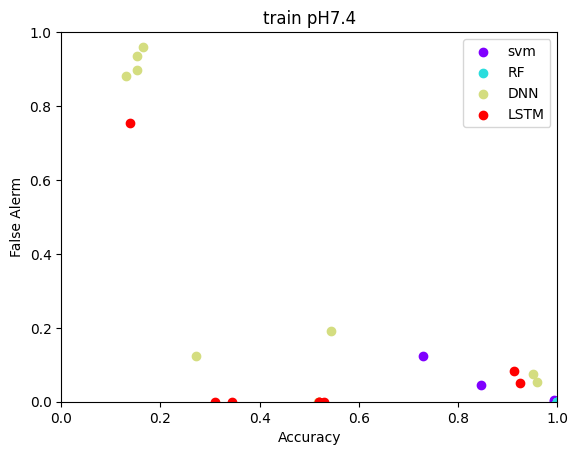

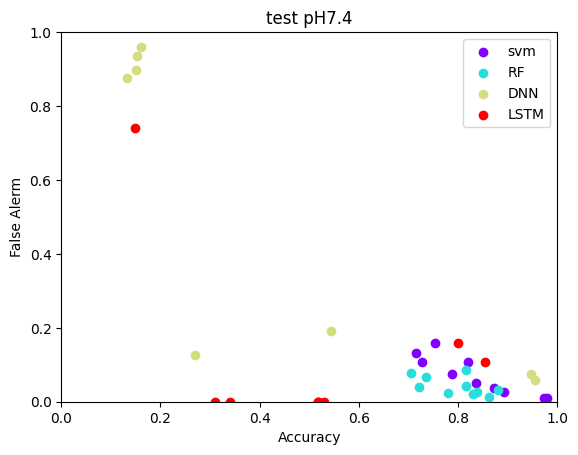

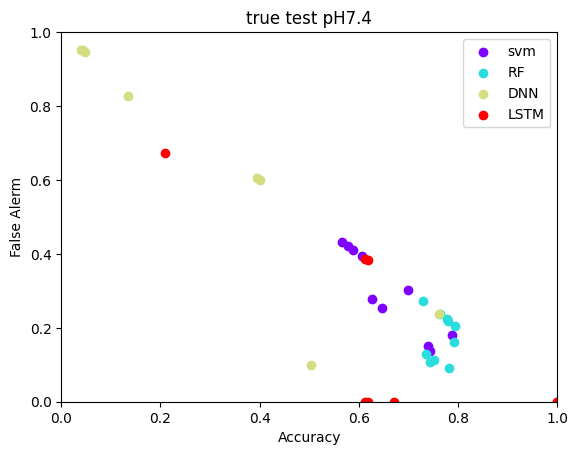

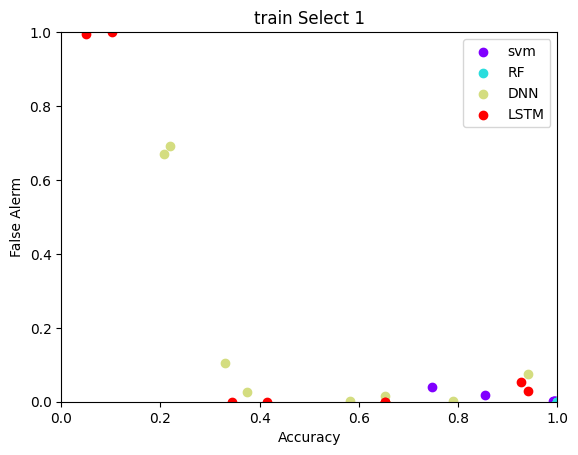

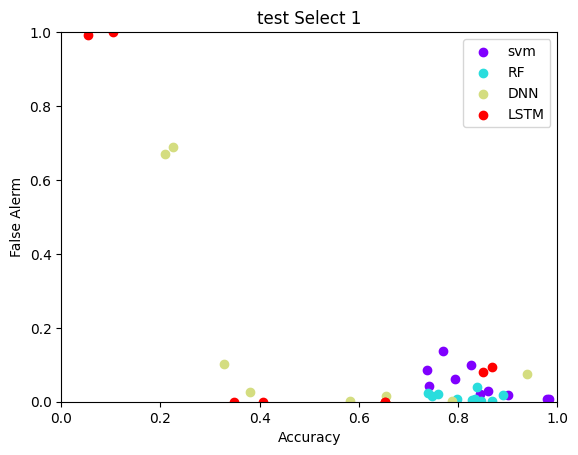

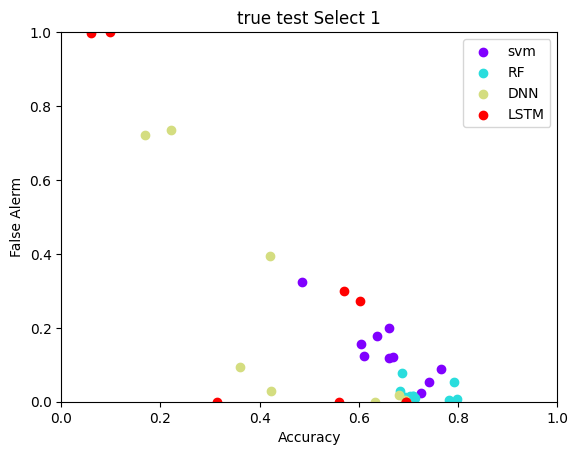

In [15]:
# compare
compare = 4 # 0 cluster, 1 frame/seg, 2 cwt, 3 window, 4 model
# axis select
ax1=0
ax2=1


# axes
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
axess = ['ACC','FA','DR']
# subplots
cols = [['acc'  ,'FA'  ,'DR'  ],['acc.1','FA.1','DR.1'],['acc.2','FA.2','DR.2'],
        ['acc.3','FA.3','DR.3'],['acc.4','FA.4','DR.4'],['acc.5','FA.5','DR.5']]
subtitles = ['train pH7.4','test pH7.4','true test pH7.4',
             'train Select 1','test Select 1','true test Select 1']
# select exp
if compare == 0:
    compares = ['N','Y']
    cmp_title = 'Clustser'
elif compare == 1:
    compares = ['F','S']
    cmp_title = 'FrameOrSegment'
elif compare == 2:
    compares = ['-','N','Y']
    cmp_title = 'CWT'
elif compare == 3:
    compares = ['-','F','H']
    cmp_title = 'Window'
elif compare == 4:
    compares = ['svm', 'RF', 'DNN', 'LSTM']
    cmp_title = 'Model'
colors = cm.rainbow(np.linspace(0, 1, len(compares)))
title = cmp_title+'_Compare_'+axess[ax1]+'-'+axess[ax2]
save_path = save_root+title+'/'
if not os.path.isdir(save_path):
    os.makedirs(save_path)

for i in range(6):
    ax = cols[i]
    plt.figure()
    for j, cmp in enumerate(compares):
        x = df[df.iloc[:,compare]==cmp][ax[ax1]].tolist()
        y = df[df.iloc[:,compare]==cmp][ax[ax2]].tolist()
        plt.scatter(x,y, color=colors[j], label=models[j])
    plt.title(subtitles[i])
    plt.xlim(0,1)
    plt.xlabel(axes[ax1])
    plt.ylim(0,1)
    plt.ylabel(axes[ax2])
    plt.legend()
    plt.savefig(save_path+title+str(i+1)+'.png')